In [12]:
import numpy as np

data = np.load('proyecto_training_data.npy')

data

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

Se fija una semilla aleatoria para garantizar la reproducibilidad de los resultados. Los datos se mezclan para evitar sesgos en la selección de entrenamiento y validación, dividiéndose después en un 80% para entrenamiento y un 20% para validación. Para manejar valores faltantes, calcula las medias de las columnas en el conjunto de entrenamiento y las usa para reemplazar los valores faltantes en ambos conjuntos. Este proceso asegura que los datos estén listos para un análisis de regresión, con variables específicas de interés ya identificadas.

In [13]:
np.random.seed(0)
np.random.shuffle(data)

train_index = int(data.shape[0] * 0.8)
train_data = data[:train_index]
validation_data = data[train_index:]
mean_values = np.nanmean(train_data, axis=0)
train_data_imputed = np.where(np.isnan(train_data), mean_values, train_data)
validation_data_imputed = np.where(np.isnan(validation_data), mean_values, validation_data)
variable_names = ["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]

Se realiza un análisis descriptivo básico de un conjunto de datos preparados para análisis, calculando estadísticas clave como la media, el valor máximo, el valor mínimo, el rango, y la desviación estándar para cada variable de interés. Luego, para cada variable, imprime estas estadísticas, proporcionando una visión clara del comportamiento y la distribución de los datos. Este paso es crucial para entender las características fundamentales de las variables antes de proceder con modelos más complejos, como la regresión lineal, facilitando la identificación de tendencias, valores atípicos y necesidades de normalización o escalado.

In [14]:
mean_values = np.mean(train_data_imputed, axis=0)
max_values = np.max(train_data_imputed, axis=0)
min_values = np.min(train_data_imputed, axis=0)
ranges = max_values - min_values
std_devs = np.std(train_data_imputed, axis=0, ddof=1)

for i, (mean, max_val, min_val, range_val, std_dev) in enumerate(zip(mean_values, max_values, min_values, ranges, std_devs)):
    variable_name = variable_names[i]
    print(f"{variable_name}:")
    print(f"  Media: {mean}")
    print(f"  Máximo: {max_val}")
    print(f"  Mínimo: {min_val}")
    print(f"  Rango: {range_val}")
    print(f"  Desviación Estándar: {std_dev}\n")

SalePrice:
  Media: 183474.3279109589
  Máximo: 755000.0
  Mínimo: 34900.0
  Rango: 720100.0
  Desviación Estándar: 81395.4227038125

OverallQual:
  Media: 6.153253424657534
  Máximo: 10.0
  Mínimo: 1.0
  Rango: 9.0
  Desviación Estándar: 1.4037432015846476

1stFlrSF:
  Media: 1168.4340753424658
  Máximo: 4692.0
  Mínimo: 334.0
  Rango: 4358.0
  Desviación Estándar: 393.66882514821316

TotRmsAbvGrd:
  Media: 6.553082191780822
  Máximo: 14.0
  Mínimo: 2.0
  Rango: 12.0
  Desviación Estándar: 1.6410304890754026

YearBuilt:
  Media: 1971.179794520548
  Máximo: 2010.0
  Mínimo: 1872.0
  Rango: 138.0
  Desviación Estándar: 30.93632018723682

LotFrontage:
  Media: 69.84504132231405
  Máximo: 313.0
  Mínimo: 21.0
  Rango: 292.0
  Desviación Estándar: 22.21189449910502



Se utiliza las bibliotecas de visualización seaborn y matplotlib para generar histogramas de variables independientes en un conjunto de datos, excluyendo la primera columna que se asume es la variable dependiente. Para cada variable independiente seleccionada, el código crea un histograma que muestra la distribución de frecuencias de los valores de esa variable, utilizando 30 bins para agrupar los datos.

C:\Users\joser\AppData\Local\Temp\ipykernel_27820\3650908550.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, bins=30, kde=False)


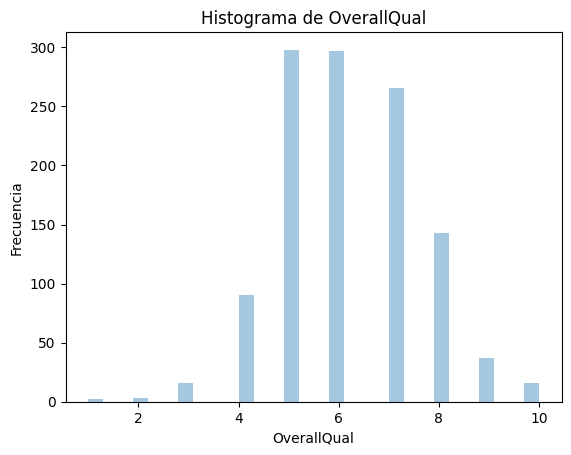

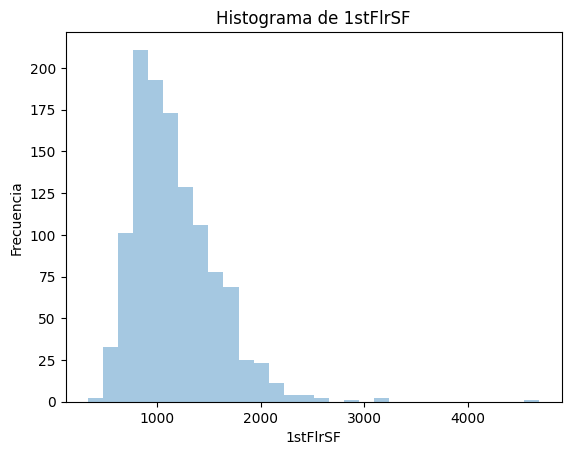

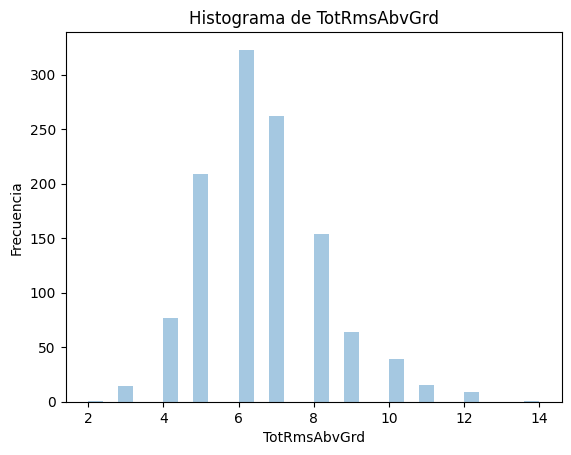

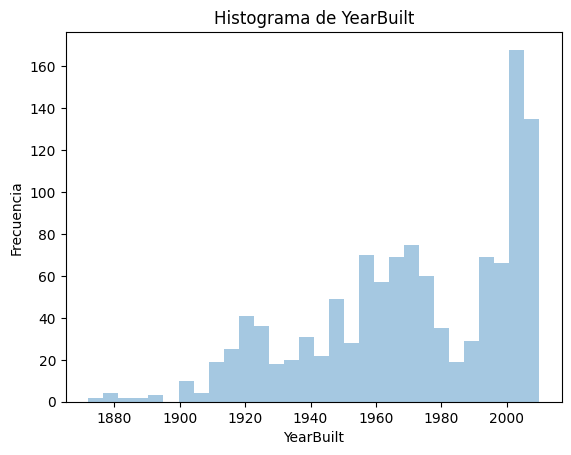

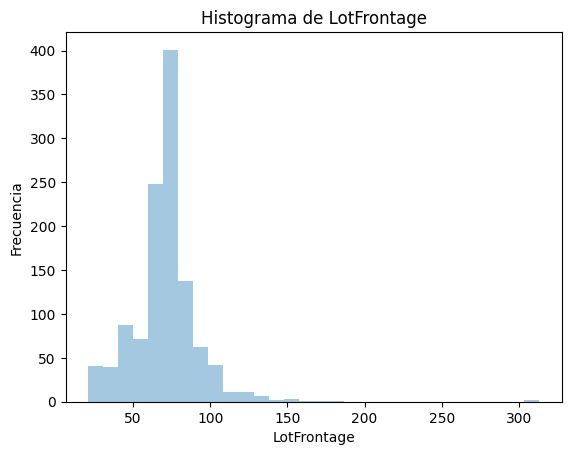

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

variables_independientes = train_data_imputed[:, 1:]

nombres_variables = ["OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]

for i, variable in enumerate(variables_independientes.T):
    sns.distplot(variable, bins=30, kde=False)
    plt.title(f'Histograma de {nombres_variables[i]}')
    plt.xlabel(nombres_variables[i])
    plt.ylabel('Frecuencia')
    plt.show()

Se genera diagramas de dispersión para cada variable independiente respecto a una variable dependiente, específicamente "SalePrice", utilizando la biblioteca seaborn. Además, calcula y muestra el coeficiente de correlación entre cada par de variables independientes y la variable dependiente, proporcionando una medida cuantitativa de la relación lineal entre ellas

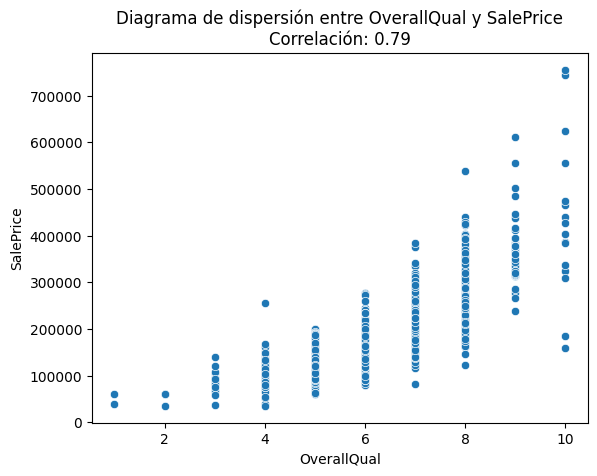

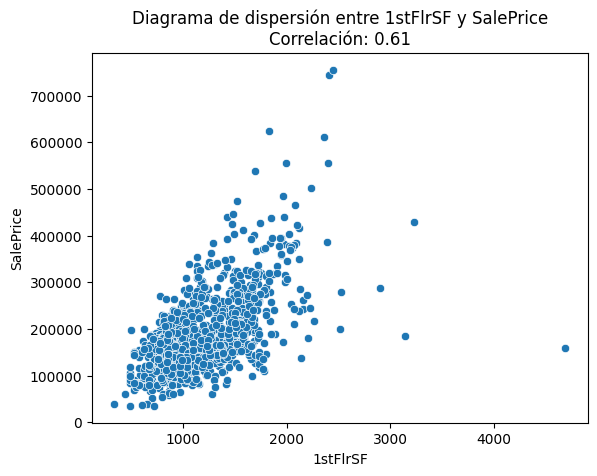

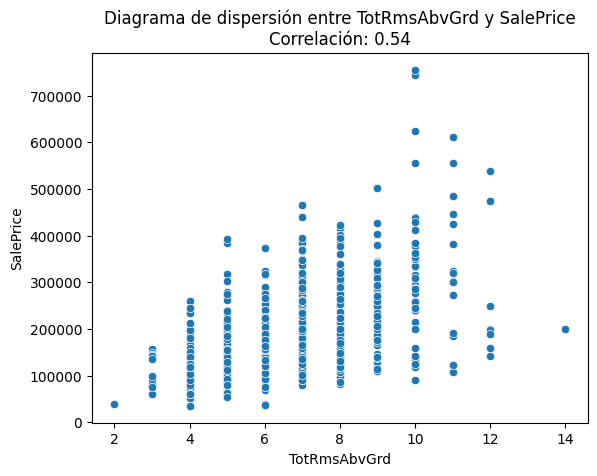

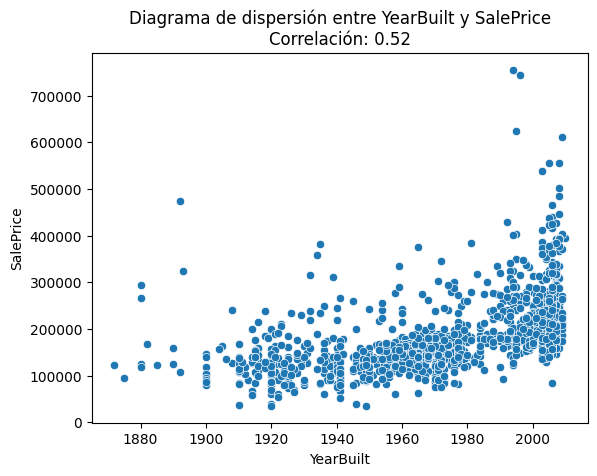

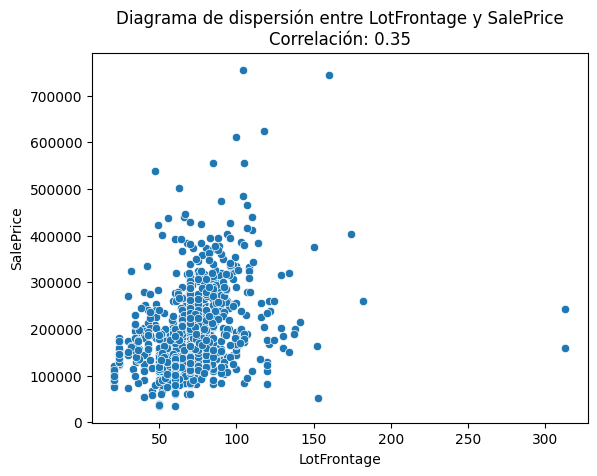

In [16]:
variable_dependiente = train_data_imputed[:, 0]

nombres_variables = ["OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]

for i, variable in enumerate(variables_independientes.T):
    sns.scatterplot(x=variable, y=variable_dependiente)
    plt.title(f'Diagrama de dispersión entre {nombres_variables[i]} y SalePrice\n' +
              f'Correlación: {np.corrcoef(variable, variable_dependiente)[0, 1]:.2f}')
    plt.xlabel(nombres_variables[i])
    plt.ylabel('SalePrice')
    plt.show()

Se muestra el coeficiente de correlación entre cada variable independiente y la variable dependiente "SalePrice" en un conjunto de datos. Luego, imprime cada correlación de manera ordenada, proporcionando una visión clara de la relación lineal entre "SalePrice" y cada una de las variables independientes como la calidad general, el tamaño del primer piso, el total de habitaciones por encima del suelo, el año de construcción y el frente del lote.

In [18]:
variable_dependiente = train_data_imputed[:, 0]
variables_independientes = train_data_imputed[:, 1:]
nombres_variables = ["OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]

correlaciones = []

for i, variable in enumerate(variables_independientes.T):
    coef_correlacion = np.corrcoef(variable, variable_dependiente)[0, 1]
    correlaciones.append((nombres_variables[i], coef_correlacion))
    print(f"Correlación entre {nombres_variables[i]} y SalePrice: {coef_correlacion:.2f}")

correlaciones.sort(key=lambda x: abs(x[1]), reverse=True)

Correlación entre OverallQual y SalePrice: 0.79
Correlación entre 1stFlrSF y SalePrice: 0.61
Correlación entre TotRmsAbvGrd y SalePrice: 0.54
Correlación entre YearBuilt y SalePrice: 0.52
Correlación entre LotFrontage y SalePrice: 0.35


Esta función entrena un modelo de regresión lineal mediante el descenso del gradiente, ajustando iterativamente los parámetros del modelo para minimizar el error cuadrático medio entre las predicciones y los valores reales. Inicializa los coeficientes en cero y, en cada iteración, actualiza estos valores en función del gradiente del error respecto a cada coeficiente, utilizando una tasa de aprendizaje especificada. Además, lleva un registro del error en cada paso y al final, devuelve los coeficientes ajustados y el historial de errores, permitiendo evaluar el desempeño del modelo a lo largo del entrenamiento.

In [21]:
def entrenar_modelo_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha):
    n = len(x)
    beta_0 = 0
    beta_1 = 0
    
    historial_error = []
    
    for epoch in range(epochs):
        y_pred = beta_0 + beta_1 * x
        
        error = (1/(2*n)) * np.sum((y_pred - y)**2)
        historial_error.append(error)
        
        gradiente_beta_0 = (1/n) * np.sum(y_pred - y)
        gradiente_beta_1 = (1/n) * np.sum((y_pred - y) * x)
        
        beta_0 -= alpha * gradiente_beta_0
        beta_1 -= alpha * gradiente_beta_1
        
        if (epoch + 1) % imprimir_error_cada == 0:
            print(f'Epoch {epoch+1}, Error: {error}')
            
    return beta_0, beta_1, historial_error

Se aplica la función de entrenamiento de regresión lineal previamente definida a un conjunto de datos específico. Selecciona una variable independiente (x) y la variable dependiente (y) de un conjunto de datos imputados, y se establece parámetros para el proceso de entrenamiento: se realizarán 1000 iteraciones (epochs), el error se imprimirá cada 100 iteraciones, y se usará una tasa de aprendizaje (alpha) de 0.01. Al llamar a la función entrenar_modelo_regresion_lineal con estos parámetros, el código inicia el entrenamiento del modelo para ajustar los coeficientes beta_0 y beta_1 que mejor se ajusten a los datos, minimizando el error cuadrático medio entre las predicciones y los valores reales. Al final del entrenamiento, se obtienen los valores finales de los coeficientes y el historial de error, proporcionando una vista completa de cómo el modelo ha aprendido y evolucionado durante el entrenamiento.

In [24]:
x = train_data_imputed[:, 1]
y = train_data_imputed[:, 0]

epochs = 1000
imprimir_error_cada = 100
alpha = 0.01

beta_0, beta_1, historial_error = entrenar_modelo_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha)

Epoch 100, Error: 1479435289.4404943
Epoch 200, Error: 1457362423.937295
Epoch 300, Error: 1437321518.4594522
Epoch 400, Error: 1419125517.024404
Epoch 500, Error: 1402604583.44731
Epoch 600, Error: 1387604516.1394978
Epoch 700, Error: 1373985308.8356898
Epoch 800, Error: 1361619843.8162432
Epoch 900, Error: 1350392705.4273288
Epoch 1000, Error: 1340199102.8247905


Se evalúa el rendimiento del modelo de regresión lineal entrenado en un conjunto de datos de validación. Selecciona la misma variable independiente y la variable dependiente del conjunto de datos de validación que se usaron para el entrenamiento. Utiliza los coeficientes beta_0 y beta_1, obtenidos del entrenamiento, para predecir los valores de y en el conjunto de validación (y_pred_val). Calcula el error cuadrático medio (MSE) entre los valores predichos y los reales, y luego obtiene la raíz cuadrada de este valor para calcular el RMSE

In [25]:
x_val = validation_data_imputed[:, 1]
y_val = validation_data_imputed[:, 0]

y_pred_val = beta_0 + beta_1 * x_val

mse = np.mean((y_pred_val - y_val)**2)
rmse = np.sqrt(mse)

print(f"RMSE en el conjunto de validación: {rmse}")

RMSE en el conjunto de validación: 44757.82043210362


Se realiza un diagrama de dispersion para evaluar la regresion lineal

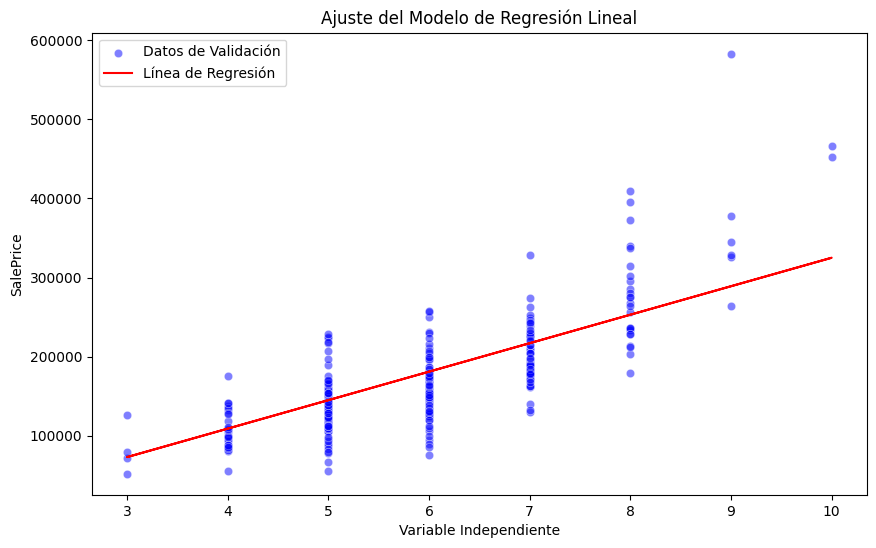

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_val, y=y_val, color="blue", alpha=0.5, label="Datos de Validación")
plt.plot(x_val, y_pred_val, color="red", label="Línea de Regresión")
plt.title("Ajuste del Modelo de Regresión Lineal")
plt.xlabel("Variable Independiente")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

Se implementa un modelo de regresión lineal utilizando la biblioteca scikit-learn, una herramienta popular para modelado estadístico y aprendizaje automático en Python. Primero, ajusta el formato de la variable independiente x para que cumpla con los requisitos de entrada de scikit-learn, convirtiéndola en un array bidimensional. Luego, crea y entrena un modelo de regresión lineal con los datos de entrenamiento x e y. Una vez entrenado el modelo, utiliza los datos de validación x_val, previamente ajustados al formato requerido, para predecir los valores de y en el conjunto de validación. Calcula el RMSE 

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x = x.reshape(-1, 1)

model = LinearRegression().fit(x, y)

y_pred_sklearn = model.predict(x_val.reshape(-1, 1))

rmse_sklearn = np.sqrt(mean_squared_error(y_val, y_pred_sklearn))
print(f"RMSE con scikit-learn: {rmse_sklearn}")

RMSE con scikit-learn: 43463.930915803394


Se crea la combinacion del modelo creado con codigo y el modelo utilizando sklearn

In [28]:
y_pred_combinada = (y_pred_val + y_pred_sklearn) / 2

rmse_combinada = np.sqrt(mean_squared_error(y_val, y_pred_combinada))
print(f"RMSE de la predicción combinada: {rmse_combinada}")

RMSE de la predicción combinada: 43571.8073320382


El modelo de sklearn es el mas preciso ya que tiene el RMSE mas bajo.

Link para video en youtube https://www.youtube.com/watch?v=gpgGv6cGbrc